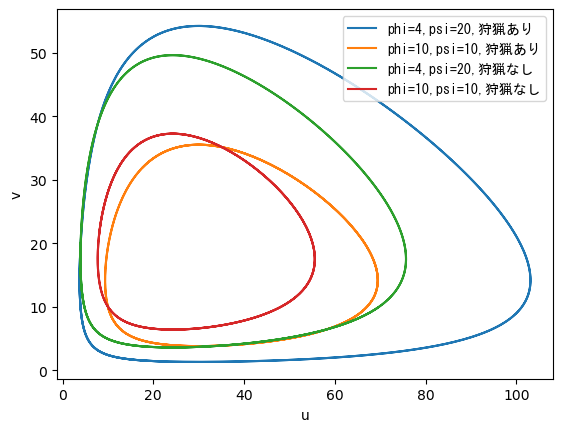

In [15]:
import numpy as np
import matplotlib.pyplot as plt


def f_1(u, v):
    return 2.1 * u - 0.12 * u * v - 0.4 * u


def f_2(u, v):
    return 0.07 * u * v - 1.7 * v - 0.4 * v


def f_3(u, v):
    return 2.1 * u - 0.12 * u * v


def f_4(u, v):
    return 0.07 * u * v - 1.7 * v


def solve_oed_runge_kutta(a, b, f_1, f_2, n, u_a, v_a):
    dt = (b - a) / n
    t = [a + i * dt for i in range(n + 1)]
    u = np.zeros(n + 1)
    v = np.zeros(n + 1)

    u[0] = u_a
    v[0] = v_a

    for i in range(n):
        k_1 = f_1(u[i], v[i])
        l_1 = f_2(u[i], v[i])

        k_2 = f_1(u[i] + (1 / 2) * dt * k_1, v[i] + (1 / 2) * dt * l_1)
        l_2 = f_2(u[i] + (1 / 2) * dt * k_1, v[i] + (1 / 2) * dt * l_1)

        k_3 = f_1(u[i] + (1 / 2) * dt * k_2, v[i] + (1 / 2) * dt * l_2)
        l_3 = f_2(u[i] + (1 / 2) * dt * k_2, v[i] + (1 / 2) * dt * l_2)

        k_4 = f_1(u[i] + dt * k_3, v[i] + dt * l_3)
        l_4 = f_2(u[i] + dt * k_3, v[i] + dt * l_3)
        u[i + 1] = u[i] + (1 / 6) * dt * (k_1 + 2 * (k_2 + k_3) + k_4)
        v[i + 1] = v[i] + (1 / 6) * dt * (l_1 + 2 * (l_2 + l_3) + l_4)

    return (u, v)


u, v = solve_oed_runge_kutta(0, 10, f_1, f_2, 1024, 4, 20)


plt.xlabel("u")
plt.ylabel("v")
u_1, v_1 = solve_oed_runge_kutta(0, 10, f_1, f_2, 1024, 10, 10)
u_2, v_2 = solve_oed_runge_kutta(0, 10, f_1, f_2, 1024, 1, 10)
u_3, v_3 = solve_oed_runge_kutta(0, 10, f_1, f_2, 1024, 20, 5)

u_4, v_4 = solve_oed_runge_kutta(0, 10, f_3, f_4, 1024, 4, 20)
u_5, v_5 = solve_oed_runge_kutta(0, 10, f_3, f_4, 1024, 10, 10)
u_6, v_6 = solve_oed_runge_kutta(0, 10, f_3, f_4, 1024, 1, 10)
u_7, v_7 = solve_oed_runge_kutta(0, 10, f_3, f_4, 1024, 20, 5)
plt.plot(u, v)
plt.plot(u_1, v_1)
# plt.plot(u_2,v_2)
# plt.plot(u_3,v_3)
plt.plot(u_4, v_4)
plt.plot(u_5, v_5)
# plt.plot(u_6,v_6)
# plt.plot(u_7,v_7)
plt.legend(
    [
        "phi=4,psi=20,狩猟あり",
        "phi=10,psi=10,狩猟あり",
        "phi=4,psi=20,狩猟なし",
        "phi=10,psi=10,狩猟なし",
    ],
    prop={"family": "MS Gothic"},
)
# plt.yticks([10*i for i in range(9)])
plt.savefig("1SC22317Y03b02.pdf")
plt.show()